# Todo código que foi utilizado até o relatório parcial. Esse código foi descontinuado

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
SEED = 123

DATASET_PATH = '/content/drive/MyDrive/IA2/Projeto IA 2/dataset'
MODELS_PATH = '/content/drive/MyDrive/IA2/Projeto IA 2/models'
RESULTS_PATH = '/content/drive/MyDrive/IA2/Projeto IA 2/results'

ARTISTS_PATH = f'{DATASET_PATH}/artists.csv'
POSSIBLE_GENRES_PATH = f'{DATASET_PATH}/possible_genres.txt'
IMAGES_PATH = f'{DATASET_PATH}/images/images'
ARTS_PATH = f'{DATASET_PATH}/arts.csv'
RESIZED_IMAGES_PATH = f'{DATASET_PATH}/images/resized'
ARTS_RESIZED_PATH = f'{DATASET_PATH}/arts_resized.csv'
PARAMETERS_PATH1 = f'{MODELS_PATH}/model1'

IMAGES_SHAPE = (256, 256, 3)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import csv
from sklearn.model_selection import train_test_split

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
def read_and_resize_img(img_path):
    image = tf.io.read_file(img_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [IMAGES_SHAPE[0], IMAGES_SHAPE[1]])
    return image

In [5]:
def read_possible_genres():
    possible_genres = open(f'{DATASET_PATH}/possible_genres.txt', 'r').read().split('\n')
    possible_genres.pop()
    return possible_genres

# Analisando e pré-processando base de dados

In [6]:
df_artists = pd.read_csv(ARTISTS_PATH)
df_artists

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


In [7]:
# Create a list of all genres
possible_genres = set()

for genres in df_artists['genre']:
    for genre in genres.split(','):
        possible_genres.add(genre)

np.savetxt(POSSIBLE_GENRES_PATH, np.array(list(possible_genres)), fmt='%s')
print(possible_genres)
print(f'São {len(possible_genres)} classes possíveis')

{'Art Nouveau', 'Neoplasticism', 'Romanticism', 'Mannerism', 'Cubism', 'Social Realism', 'Impressionism', 'Muralism', 'Early Renaissance', 'Baroque', 'Primitivism', 'Abstractionism', 'Symbolism', 'Expressionism', 'Northern Renaissance', 'High Renaissance', 'Pop Art', 'Proto Renaissance', 'Suprematism', 'Realism', 'Surrealism', 'Abstract Expressionism', 'Post-Impressionism', 'Byzantine Art'}
São 24 classes possíveis


In [ ]:
#Cria o dataframe com as imagens e as classes
for i, artist in df_artists.iterrows():
    arts_number = artist['paintings']
    current_genres = artist['genre'].split(',')
    artist_name = artist['name'].replace(' ', '_')
    art_artist_dict = {}

    art_artist_dict['artist id'] = np.repeat(artist['id'], arts_number)
    art_artist_dict['image path'] = np.array([f'{IMAGES_PATH}/{artist_name}/{artist_name}_{art_num}.jpg' for art_num in range(1, arts_number + 1)])
    for genre in possible_genres:
        if genre in current_genres:
            art_artist_dict[genre] = np.ones((arts_number), dtype=np.int8)
        else:
            art_artist_dict[genre] = np.zeros((arts_number), dtype=np.int8)
    df_art_artist = pd.DataFrame(art_artist_dict)
    if i == 0:
        df_arts = df_art_artist
    else:
        df_arts = pd.concat([df_arts, df_art_artist], ignore_index=True)
df_arts

,artist id,image path,Mannerism,Pop Art,Symbolism,Abstract Expressionism,Surrealism,Cubism,Baroque,Byzantine Art,...,Abstractionism,Proto Renaissance,Expressionism,Realism,Post-Impressionism,Art Nouveau,Muralism,Northern Renaissance,Early Renaissance,Suprematism
0,0,/content/drive/MyDrive/IA2/Projeto IA 2/datase...,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,/content/drive/MyDrive/IA2/Projeto IA 2/datase...,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,/content/drive/MyDrive/IA2/Projeto IA 2/datase...,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,/content/drive/MyDrive/IA2/Projeto IA 2/datase...,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,/content/drive/MyDrive/IA2/Projeto IA 2/datase...,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8441,49,/content/drive/MyDrive/IA2/Projeto IA 2/datase...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8442,49,/content/drive/MyDrive/IA2/Projeto IA 2/datase...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8443,49,/content/drive/MyDrive/IA2/Projeto IA 2/datase...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8444,49,/content/drive/MyDrive/IA2/Projeto IA 2/datase...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_arts.to_csv(f'{DATASET_PATH}/arts.csv', index=False)

In [ ]:
def plotar_imgs_artist(df_arts, artist_id):
    artist = df_arts[df_arts['artist id'] == artist_id]
    fig, axs = plt.subplots(2, 2, figsize=(6, 6))

    axs[0, 0].set_title('Primeira imagem')
    axs[0, 0].imshow(read_and_resize_img(artist['image path'].iloc[0]))

    axs[0, 1].set_title('Segunda imagem')
    axs[0, 1].imshow(read_and_resize_img(artist['image path'].iloc[1]))

    axs[1, 0].set_title('Última imagem')
    axs[1, 0].imshow(read_and_resize_img(artist['image path'].iloc[-1]))

    axs[1, 1].set_title('Penúltima imagem')
    axs[1, 1].imshow(read_and_resize_img(artist['image path'].iloc[-2]))

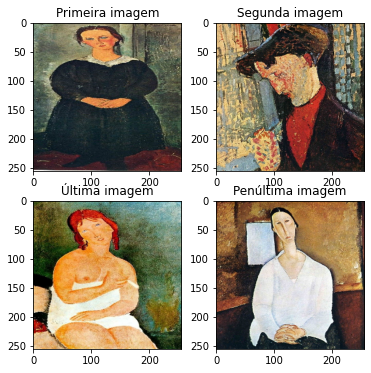

In [ ]:
plotar_imgs_artist(df_arts, 0)

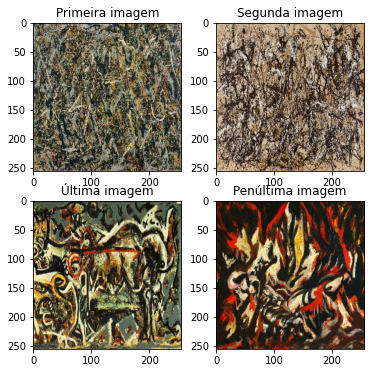

In [ ]:
plotar_imgs_artist(df_arts, 49)

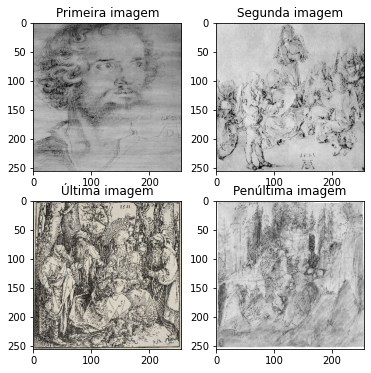

In [ ]:
plotar_imgs_artist(df_arts, 19)

In [ ]:
# Executar o código a seguir caso tenha ocorrido um problema de enconding ao
# baixar o dataset

import os
import shutil

erro1 = 'Albrecht_DuÔòá├¬rer'
erro2 = 'Albrecht_Du╠êrer'

correto = df_artists.iloc[19]['name'].replace(' ', '_')


if os.path.exists(f'dataset/images/images/{erro1}'):
    shutil.rmtree(f'dataset/images/images/{erro1}')

if os.path.exists(f'dataset/images/images/{erro2}'):
    os.rename(
        f'dataset/images/images/{erro2}', 
        f'dataset/images/images/{correto}'
    )

    for i, file in enumerate(os.listdir(f'dataset/images/images/{correto}')):
        os.rename(
            f'dataset/images/images/{correto}/{file}', 
            f'dataset/images/images/{correto}/{correto}_{i+1}.jpg'
        )

In [ ]:
def load_dataset(arts_dataset=ARTS_PATH):
    df_arts = pd.read_csv(arts_dataset)
    images = np.zeros((len(df_arts), *IMAGES_SHAPE), dtype=np.float32)
    
    for i, art in df_arts.iterrows():
        images[i] = read_and_resize_img(art['image path'])
        print(i)

    return images, df_arts

In [ ]:
def load_resized_dataset(arts_dataset=ARTS_RESIZED_PATH):
  df_arts = pd.read_csv(arts_dataset)
  images = np.zeros((len(df_arts), *IMAGES_SHAPE), dtype=np.float32)
  
  for i, art in df_arts.iterrows():
      img_path = art['image path']

      image = tf.io.read_file(img_path)
      image = tf.image.decode_jpeg(image, channels=3)
      image = tf.image.convert_image_dtype(image, tf.float32)

      print(i)

      images[i] = image

  return images, df_arts

In [ ]:
def resize_all_images():
  if not os.path.exists(RESIZED_IMAGES_PATH):
    os.mkdir(RESIZED_IMAGES_PATH)

  for i, art in df_arts.iterrows():
      img_path = art['image path']
      img_name = img_path.split('/')[-1]
      artist_name = img_path.split('/')[-2]
      new_img_path = f'{RESIZED_IMAGES_PATH}/{artist_name}/{img_name}'
      df_arts['image path'][i] = new_img_path

      if not os.path.exists(f'{RESIZED_IMAGES_PATH}/{artist_name}'):
        os.mkdir(f'{RESIZED_IMAGES_PATH}/{artist_name}')
      elif os.path.exists(new_img_path):
        continue
      
      image = read_and_resize_img(img_path)
      tf.keras.utils.save_img(new_img_path, image)

  df_arts.to_csv(ARTS_RESIZED_PATH, index=False)

In [ ]:
def load_dataset_tensorflow(arts_dataset=ARTS_PATH):
  df_arts = pd.read_csv(arts_dataset)
  images = tf.keras.utils.image_dataset_from_directory(
      RESIZED_IMAGES_PATH,
      label_mode=None,
      image_size=(IMAGES_SHAPE[0], IMAGES_SHAPE[1]),
      labels=df_arts.drop(columns=['artist id', 'image path']).to_numpy().tolist()
  )
  return images


In [ ]:
# resize_all_images()
# images, df_arts = load_resized_dataset()

In [ ]:
# images, df_arts = load_dataset()
# df_arts.head()

In [ ]:
dataset = load_dataset_tensorflow()
dataset

Found 8446 files belonging to 1 classes.


<BatchDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>

In [38]:
df_art = pd.read_csv(ARTS_RESIZED_PATH)

In [44]:
possible_genres = read_possible_genres()

In [43]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [41]:
train_df, test_df = train_test_split(df_art, test_size=0.05, stratify=df_art['artist id'], random_state=SEED)

In [45]:
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=RESIZED_IMAGES_PATH,
    x_col='image path',
    y_col=possible_genres,
    batch_size=32,
    seed=SEED,
    shuffle=True,
    class_mode="raw",
    target_size=(IMAGES_SHAPE[0], IMAGES_SHAPE[1])
)


Found 8023 validated image filenames.


## Separando os dados em treino e teste

## Treinando primeira rede neural

In [46]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

OUTPUT_SIZE = len(read_possible_genres())


In [47]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=IMAGES_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(OUTPUT_SIZE, activation='sigmoid'))

In [48]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_generator, epochs=5)

Epoch 1/5
251/251 [==============================] - 1599s 6s/step - loss: 0.1829 - accuracy: 0.2357
Epoch 2/5
251/251 [==============================] - 1038s 4s/step - loss: 0.1558 - accuracy: 0.3171
Epoch 3/5
251/251 [==============================] - 1037s 4s/step - loss: 0.1357 - accuracy: 0.4083
Epoch 4/5
251/251 [==============================] - 1036s 4s/step - loss: 0.0981 - accuracy: 0.5869
Epoch 5/5
251/251 [==============================] - 2079s 8s/step - loss: 0.0588 - accuracy: 0.7376


In [49]:
model.save(PARAMETERS_PATH1)

In [50]:
model2 = tf.keras.models.load_model(PARAMETERS_PATH1)

In [ ]:
venus = read_and_resize_img(f'/content/drive/MyDrive/IA2/Projeto IA 2/dataset/images/resized/Sandro_Botticelli/Sandro_Botticelli_22.jpg')
venus = venus.numpy()
model.predict(venus)


NameError: ignored

In [34]:
venus = read_and_resize_img(f'/content/drive/MyDrive/IA2/Projeto IA 2/dataset/images/resized/Sandro_Botticelli/Sandro_Botticelli_22.jpg')
venus = venus.numpy()
model2.predict(venus.reshape(1, 256, 256, 3))[0]

1/1 [==============================] - 0s 54ms/step


array([6.9664743e-06, 5.6869609e-12, 1.2512229e-05, 1.1775479e-09,
       4.1140895e-05, 4.7837528e-08, 3.1221996e-04, 5.7491377e-07,
       8.4975471e-07, 5.6216926e-08, 2.0195897e-11, 2.7512269e-11,
       2.3949100e-05, 7.1266283e-12, 5.4953841e-04, 4.8684675e-04,
       1.3090780e-08, 1.6921367e-10, 9.7670068e-09, 2.2702420e-09,
       9.2879606e-09, 6.4365834e-04, 1.0000000e+00, 7.3154219e-11],
      dtype=float32)

In [51]:
possible_genres = read_possible_genres()
preds = pd.DataFrame(columns=possible_genres)
preds

,Art Nouveau,Neoplasticism,Romanticism,Mannerism,Cubism,Social Realism,Impressionism,Muralism,Early Renaissance,Baroque,...,Northern Renaissance,High Renaissance,Pop Art,Proto Renaissance,Suprematism,Realism,Surrealism,Abstract Expressionism,Post-Impressionism,Byzantine Art


In [52]:
for i, test_row in test_df.iterrows():
  image = read_and_resize_img(test_row['image path'])
  pred = model2.predict(image.numpy().reshape(1, 256, 256, 3))

  pred_df = pd.DataFrame(pred, columns=possible_genres)
  preds = pd.concat([preds, pred_df], ignore_index=True)
preds

1/1 [==============================] - 0s 51ms/step


,Art Nouveau,Neoplasticism,Romanticism,Mannerism,Cubism,Social Realism,Impressionism,Muralism,Early Renaissance,Baroque,...,Northern Renaissance,High Renaissance,Pop Art,Proto Renaissance,Suprematism,Realism,Surrealism,Abstract Expressionism,Post-Impressionism,Byzantine Art
0,3.698406e-18,8.508317e-12,9.999998e-01,4.117886e-16,2.714563e-14,7.713941e-16,3.463391e-08,3.068724e-22,5.478906e-10,9.714506e-12,...,5.325202e-12,9.370856e-18,4.964428e-09,5.930306e-21,8.182104e-08,2.366831e-14,1.631209e-13,7.785564e-33,6.757410e-13,2.019655e-15
1,9.787170e-04,1.469348e-02,1.161773e-03,7.020476e-06,3.663581e-04,1.937517e-05,8.255333e-01,7.329300e-07,7.598595e-05,2.554946e-04,...,2.765310e-04,1.075735e-03,4.504193e-04,1.110383e-04,6.374843e-04,1.108444e-05,2.333822e-03,4.349205e-06,2.852488e-01,1.111209e-02
2,2.407131e-04,9.769919e-05,1.316488e-03,1.815130e-02,3.353638e-03,5.995582e-05,2.239716e-02,3.219734e-06,1.014628e-05,5.308905e-01,...,1.282936e-03,3.447869e-02,2.765240e-05,6.998458e-04,6.656738e-04,5.119467e-03,2.880265e-03,1.214273e-04,3.940184e-03,1.022117e-05
3,6.795265e-10,2.438758e-03,1.318382e-05,1.112178e-09,2.681371e-07,7.501647e-09,7.416686e-01,6.736937e-09,2.828014e-09,1.220485e-09,...,4.196259e-10,2.195288e-05,6.674214e-06,3.403277e-12,2.713782e-05,6.995388e-12,1.030063e-04,4.970323e-12,6.630813e-02,1.414121e-05
4,2.046335e-04,2.926375e-02,6.005041e-06,2.142575e-02,2.040211e-02,2.154916e-03,4.702719e-01,2.008251e-04,5.568554e-06,4.541068e-04,...,1.125598e-05,6.917838e-03,4.511397e-04,5.682471e-03,2.179053e-02,1.755818e-04,2.285527e-01,1.616848e-05,4.409699e-01,5.048575e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2.188540e-09,1.568719e-06,1.499806e-06,8.470770e-06,1.336612e-03,3.122296e-06,2.382175e-01,7.885808e-07,7.850005e-08,5.271852e-01,...,3.001027e-09,3.680315e-05,7.195666e-04,7.153801e-02,1.078580e-05,6.204653e-09,5.422763e-06,5.661254e-13,7.903919e-04,3.761377e-07
419,7.047680e-03,2.149036e-05,2.007829e-05,5.894472e-04,2.357685e-01,2.225734e-04,7.503469e-01,6.729671e-05,1.007431e-04,2.436058e-04,...,5.092758e-06,1.774580e-03,1.255525e-04,1.507944e-02,2.382340e-02,1.182258e-03,4.077154e-03,8.176431e-07,1.389553e-02,5.831993e-03
420,1.646718e-05,4.185647e-06,3.624794e-03,1.700022e-05,3.047343e-03,5.997505e-04,3.748822e-01,2.491624e-05,1.034131e-05,1.607885e-04,...,5.321294e-07,8.045699e-07,6.168465e-07,1.961823e-04,3.594745e-04,2.930009e-01,3.587953e-05,4.959336e-09,8.084410e-03,3.346882e-05
421,2.916578e-04,1.156776e-02,4.700318e-07,4.343780e-07,8.373149e-04,6.367904e-07,1.915812e-03,9.498761e-06,7.559146e-08,5.689639e-09,...,6.406560e-04,4.650663e-08,3.335048e-05,6.139704e-09,7.892791e-04,5.512744e-10,3.400190e-01,1.773556e-05,8.271547e-01,3.683313e-03


In [53]:
preds_model = (preds > 0.5).astype(np.uint8)
preds_model

,Art Nouveau,Neoplasticism,Romanticism,Mannerism,Cubism,Social Realism,Impressionism,Muralism,Early Renaissance,Baroque,...,Northern Renaissance,High Renaissance,Pop Art,Proto Renaissance,Suprematism,Realism,Surrealism,Abstract Expressionism,Post-Impressionism,Byzantine Art
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
419,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [54]:
preds_baseline = pd.DataFrame(np.zeros((len(test_df), len(possible_genres))), columns=possible_genres, dtype=np.uint8).reset_index()
preds_baseline

,index,Art Nouveau,Neoplasticism,Romanticism,Mannerism,Cubism,Social Realism,Impressionism,Muralism,Early Renaissance,...,Northern Renaissance,High Renaissance,Pop Art,Proto Renaissance,Suprematism,Realism,Surrealism,Abstract Expressionism,Post-Impressionism,Byzantine Art
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,418,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
419,419,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,420,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,421,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y_true = test_df[possible_genres].reset_index(drop=True)
y_true

,Art Nouveau,Neoplasticism,Romanticism,Mannerism,Cubism,Social Realism,Impressionism,Muralism,Early Renaissance,Baroque,...,Northern Renaissance,High Renaissance,Pop Art,Proto Renaissance,Suprematism,Realism,Surrealism,Abstract Expressionism,Post-Impressionism,Byzantine Art
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
419,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
421,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

df_metrics = pd.DataFrame(columns=['genre', 'accuracy', 'precision', 'recall', 'f1'])

tp = 0
fp = 0
fn = 0

for genre in possible_genres:
  metrics = {}

  tp += ((preds_model[genre] == 1) & (y_true[genre] == 1)).sum()
  fp += ((preds_model[genre] == 1) & (y_true[genre] == 0)).sum()
  fn += ((preds_model[genre] == 0) & (y_true[genre] == 1)).sum()

  metrics['genre'] = [genre]
  metrics['accuracy'] = [accuracy_score(preds_model[genre], y_true[genre])]
  metrics['precision'] = [precision_score(preds_model[genre], y_true[genre])]
  metrics['recall'] = [recall_score(preds_model[genre], y_true[genre])]
  metrics['f1'] = [f1_score(preds_model[genre], y_true[genre])]

  df_metrics = pd.concat([df_metrics, pd.DataFrame(metrics)], ignore_index=True)
df_metrics.to_csv(f'{RESULTS_PATH}/por_classes_model.csv', index=False)
df_metrics

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to 

,genre,accuracy,precision,recall,f1
0,Art Nouveau,0.988180,0.166667,1.000000,0.285714
1,Neoplasticism,0.990544,0.000000,0.000000,0.000000
2,Romanticism,0.955083,0.150000,0.600000,0.240000
3,Mannerism,0.964539,0.294118,0.625000,0.400000
4,Cubism,0.950355,0.227273,0.555556,0.322581
5,Social Realism,0.990544,0.000000,0.000000,0.000000
6,Impressionism,0.775414,0.489796,0.516129,0.502618
7,Muralism,0.990544,0.000000,0.000000,0.000000
8,Early Renaissance,0.981087,0.000000,0.000000,0.000000
9,Baroque,0.936170,0.448276,0.541667,0.490566


In [57]:
macro_precision = tp / (tp + fp)
macro_recall = tp / (tp + fn)

results = pd.DataFrame({
    'mean accuracy': [df_metrics['accuracy'].mean()],
    'micro precision': [df_metrics['precision'].mean()],
    'micro recall': [df_metrics['recall'].mean()],
    'micro f1': [df_metrics['f1'].mean()],
    'macro precision': [macro_precision],
    'macro recall': [macro_recall],
    'macro f1': [2 * ((macro_precision * macro_recall) / (macro_precision + macro_recall))]
})
results.to_csv(f'{RESULTS_PATH}/general_model.csv', index=False)
results

,mean accuracy,micro precision,micro recall,micro f1,macro precision,macro recall,macro f1
0,0.947991,0.144372,0.360493,0.187078,0.489796,0.275862,0.352941


In [58]:
df_metrics_baseline = pd.DataFrame(columns=['genre', 'accuracy', 'precision', 'recall', 'f1'])

tp = 0
fp = 0
fn = 0

for genre in possible_genres:
  metrics = {}

  tp += ((preds_baseline[genre] == 1) & (y_true[genre] == 1)).sum()
  fp += ((preds_baseline[genre] == 1) & (y_true[genre] == 0)).sum()
  fn += ((preds_baseline[genre] == 0) & (y_true[genre] == 1)).sum()

  metrics['genre'] = [genre]
  metrics['accuracy'] = [accuracy_score(preds_baseline[genre], y_true[genre])]
  metrics['precision'] = [precision_score(preds_baseline[genre], y_true[genre])]
  metrics['recall'] = [recall_score(preds_baseline[genre], y_true[genre])]
  metrics['f1'] = [f1_score(preds_baseline[genre], y_true[genre])]

  df_metrics_baseline = pd.concat([df_metrics_baseline, pd.DataFrame(metrics)], ignore_index=True)
df_metrics_baseline

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to 

,genre,accuracy,precision,recall,f1
0,Art Nouveau,0.985816,0.0,0.0,0.0
1,Neoplasticism,0.990544,0.0,0.0,0.0
2,Romanticism,0.952719,0.0,0.0,0.0
3,Mannerism,0.959811,0.0,0.0,0.0
4,Cubism,0.947991,0.0,0.0,0.0
5,Social Realism,0.990544,0.0,0.0,0.0
6,Impressionism,0.768322,0.0,0.0,0.0
7,Muralism,0.990544,0.0,0.0,0.0
8,Early Renaissance,0.981087,0.0,0.0,0.0
9,Baroque,0.931442,0.0,0.0,0.0


In [59]:
macro_precision = tp / (tp + fp)
macro_recall = tp / (tp + fn)

results = pd.DataFrame({
    'mean accuracy': [df_metrics_baseline['accuracy'].mean()],
    'micro precision': [df_metrics_baseline['precision'].mean()],
    'micro recall': [df_metrics_baseline['recall'].mean()],
    'micro f1': [df_metrics_baseline['f1'].mean()],
    'macro precision': [macro_precision],
    'macro recall': [macro_recall],
    'macro f1': [2 * ((macro_precision * macro_recall) / (macro_precision + macro_recall))]
})
results.to_csv(f'{RESULTS_PATH}/general_baseline.csv')
results

<ipython-input-59-bb52457bfad5>:1: RuntimeWarning: invalid value encountered in long_scalars
  macro_precision = tp / (tp + fp)


,mean accuracy,micro precision,micro recall,micro f1,macro precision,macro recall,macro f1
0,0.948582,0.0,0.0,0.0,NaN,0.0,NaN


In [60]:

(preds_model['Mannerism'] == y_true['Mannerism']).sum() / 423

0.9645390070921985

In [61]:
def predict_genres(path):
  image = read_and_resize_img(path)
  image = image.numpy()
  print(model2.predict(image.reshape(1, 256, 256, 3)))
  return np.array(possible_genres)[model2.predict(image.reshape(1, 256, 256, 3))[0] > 0.5]

In [62]:
pd.read_csv(ARTISTS_PATH)

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


In [63]:
predict_genres(f'{IMAGES_PATH}/Sandro_Botticelli/Sandro_Botticelli_22.jpg')

1/1 [==============================] - 0s 53ms/step
[[6.1997898e-02 2.4853864e-07 1.4716822e-07 8.5869704e-07 2.4008233e-04
  5.2301782e-08 9.3584405e-03 1.3991640e-03 9.8933083e-01 6.5597042e-04
  3.9300288e-05 4.1406889e-05 1.2150187e-03 2.9934137e-03 1.0978685e-01
  7.7674359e-02 2.4072862e-05 3.1811784e-03 2.8921171e-05 2.4049147e-03
  6.9976729e-01 5.7115999e-06 1.3366414e-03 9.0688258e-07]]
1/1 [==============================] - 0s 52ms/step


array(['Early Renaissance', 'Surrealism'], dtype='<U22')

In [64]:
predict_genres(f'{IMAGES_PATH}/Leonardo_da_Vinci/Leonardo_da_Vinci_121.jpg')

1/1 [==============================] - 0s 59ms/step
[[5.2992655e-03 7.8128866e-04 1.5857747e-02 9.9019995e-03 6.7581679e-03
  3.2736358e-04 3.7025058e-01 3.4443416e-05 6.2967427e-03 1.6081857e-02
  2.0983518e-05 6.1460608e-04 1.3292520e-01 1.3988182e-02 6.9170585e-03
  2.8867403e-01 7.8546575e-05 2.2478428e-04 1.0607937e-02 1.1350203e-02
  5.4189912e-03 1.2863211e-04 5.2747499e-02 1.0724238e-03]]
1/1 [==============================] - 0s 71ms/step


array([], dtype='<U22')

In [65]:
predict_genres('/content/drive/MyDrive/IA2/Projeto IA 2/004398001019.jpg')

NotFoundError: ignored